In [1]:
"""!python.exe -m pip install --upgrade pip
!pip install -q mediapipe"""

'!python.exe -m pip install --upgrade pip\n!pip install -q mediapipe'

In [2]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

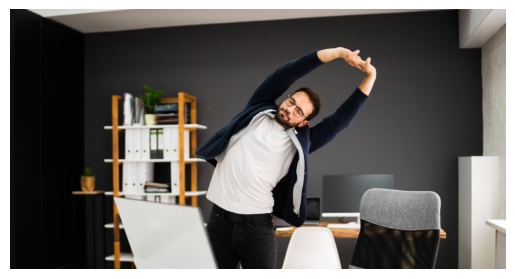

In [3]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('user.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [4]:
keymapper = {
  "0":  "nose",
  "1":  "left_eye_inner",
  "2":  "left_eye",
  "3":  "left_eye_outer",
  "4":  "right_eye_inner",
  "5":  "right_eye",
  "6":  "right_eye_outer",
  "7":  "left_ear",
  "8":  "right_ear",
  "9":  "mouth_left",
  "10": "mouth_right",
  "11": "left_shoulder",
  "12": "right_shoulder",
  "13": "left_elbow",
  "14": "right_elbow",
  "15": "left_wrist",
  "16": "right_wrist",
  "17": "left_pinky",
  "18": "right_pinky",
  "19": "left_index",
  "20": "right_index",
  "21": "left_thumb",
  "22": "right_thumb",
  "23": "left_hip",
  "24": "right_hip",
  "25": "left_knee",
  "26": "right_knee",
  "27": "left_ankle",
  "28": "right_ankle",
  "29": "left_heel",
  "30": "right_heel",
  "31": "left_foot_index",
  "32": "right_foot_index"
}

In [5]:


def draw_landmarks_on_image(rgb_image, detection_result):
    annotated = np.copy(rgb_image)
    h, w, _ = annotated.shape

    # draw bigger circles
    for pose_landmarks in detection_result.pose_landmarks:
        for lm in pose_landmarks:
            print(lm)
            x_px = int(lm.x * w)
            y_px = int(lm.y * h)
            cv2.circle(annotated, (x_px, y_px), 4, (0, 255, 0), -1)

    # draw thicker connection lines
    for pose_landmarks in detection_result.pose_landmarks:
        for start_idx, end_idx in mp.solutions.pose.POSE_CONNECTIONS:
            p1 = pose_landmarks[start_idx]
            p2 = pose_landmarks[end_idx]
            x1, y1 = int(p1.x * w), int(p1.y * h)
            x2, y2 = int(p2.x * w), int(p2.y * h)
            cv2.line(annotated, (x1, y1), (x2, y2), (0, 200, 255), 4)
            cv2.putText(annotated, keymapper[str(start_idx)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    return annotated



NormalizedLandmark(x=0.5657498240470886, y=0.3977924883365631, z=-0.17729857563972473, visibility=0.9983208775520325, presence=0.9989761114120483)
NormalizedLandmark(x=0.5839015245437622, y=0.3945000171661377, z=-0.15381060540676117, visibility=0.9968921542167664, presence=0.9978038668632507)
NormalizedLandmark(x=0.5878182053565979, y=0.4025056064128876, z=-0.1540757119655609, visibility=0.9946887493133545, presence=0.9975984692573547)
NormalizedLandmark(x=0.5897119045257568, y=0.4092346727848053, z=-0.1541161835193634, visibility=0.9968098998069763, presence=0.9959955215454102)
NormalizedLandmark(x=0.574017345905304, y=0.37185537815093994, z=-0.15998037159442902, visibility=0.9983469247817993, presence=0.997894823551178)
NormalizedLandmark(x=0.5709600448608398, y=0.36387962102890015, z=-0.16045282781124115, visibility=0.9979203343391418, presence=0.9982315897941589)
NormalizedLandmark(x=0.5683216452598572, y=0.35761430859565735, z=-0.1607218086719513, visibility=0.998915433883667, pre

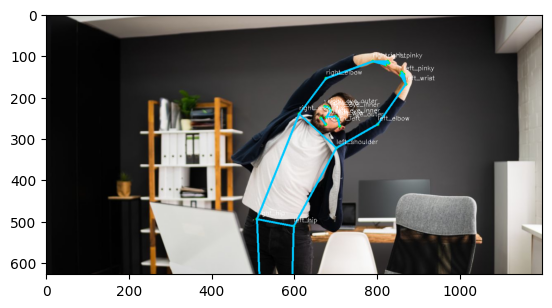

In [6]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker_heavy.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("user.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2.imwrite('annotated_user.jpg', annotated_image)
plt.imshow(annotated_image)
plt.show()

In [8]:
from lateral_neck_tilt import check_initial_position

check_initial_position(detection_result.pose_landmarks[0], keymapper)

Shoulder angle: 59.90 degrees
Eye angle: 66.42 degrees


{'ok': False,
 'issues': ['shoulders_not_level', 'head_not_level'],
 'metrics': {'shoulder_angle': {'value': 59.898116406882004,
   'rule': 'abs <= 5'},
  'eye_angle': {'value': 66.42132508968051, 'rule': 'abs <= 5'}}}